In [3]:
import numpy as np
import pandas as pd
import sys 
path = '..'
sys.path.append(path)
from logger import Logger
import matplotlib.pyplot as plt
import gui as GUI

In [4]:
def cost_computing(task, state):
    if task == 1:
        Weight_Matrix_t = np.diag([50,50,80,10,10,10,5,5,5,1,1,1])
        GOAL = np.array([1.5,1.5,4.0, 0,0,0,0,0,0,0,0,0])
        cost = (0.5 * (state - GOAL).dot(Weight_Matrix_t).dot(state - GOAL))
    elif task == 2:
        v = np.sqrt(state[3]**2 + state[4]**2)# + state[5]**2)
        goal_v = 2
        d_a = 4.0
        d_b = 4.0
        cost = 100*np.abs((state[0]/(d_a/2))**2+(state[1]/(d_b/2))**2-1) + 100*(state[2]-2)**2 + 20*(v - goal_v)**2 + 20*state[5]**2 \
                    + 0.5*(state[3:]).dot(state[3:])
    return cost

In [5]:
def string2list_Quad(temp):
    temp_result = []
    for i in range(len(temp)):
        # Quadcopter
        temp_value = temp[i].replace('\r\n','').replace('[', '').replace(']', '').split(' ')
        temp_value = [float(x) for x in temp_value if x != '']
        #print(temp_value)
        temp_result.append(temp_value)
        #print(temp_result)
    return np.array(temp_result)

In [178]:
def result_process(log, flag_combine):
    len_seq_all = []
    state_sequence_all = []#np.array([])
    cost_sequence_all = []#np.array([])
    for j in log.df.Epoch.unique():
        state_seq = log.df[(log.df['Phase'] == 'Update') & (log.df['Parameter'] == 'State_Init') & (log.df['Epoch'] == j)].reset_index(drop=True)['Value']
        len_seq_all.append(len(state_seq))
    print(len_seq_all)
    for j in log.df.Epoch.unique():
        state_seq = log.df[(log.df['Phase'] == 'Update') & (log.df['Parameter'] == 'State_Init') & (log.df['Epoch'] == j)].reset_index(drop=True)['Value']
        if flag_combine:
            sequence = string2list_Quad(state_seq)[:min(len_seq_all)]
        else:
            sequence = string2list_Quad(state_seq)#[:len_seq]
        cost_sequence = np.array([])
        for i in range(len(sequence)):
            state = sequence[i]
            cost = cost_computing(1, state)
            cost_sequence = np.append(cost_sequence, cost)        
        cost_sequence_all.append(np.array(cost_sequence))
        state_sequence_all.append(np.array(sequence))
    return np.array(state_sequence_all), np.array(cost_sequence_all), min(len_seq_all)

In [192]:
if False:
    labels = ['test']
    filename = ['108_Logger_Quadcopter_Ring_20200327015244']
elif False:
    # Test Set
    labels = ['NoNegative', 'YesNegative']
    filename = ['69_Logger_Quadcopter_Goal_20200324004214', '70_Logger_Quadcopter_Goal_20200324145604']
#############################################################################################
#####################   Achieve the Goal    #################################################
#############################################################################################
# Noise in Angle
elif False:
    # Compare the Noise in Angle
    title = 'Comparison of Different Angle Noises'
    labels = ['0.1', '0.5', '1', '2', '5', '10']
    filename = ['1_Logger_Quadcopter_Goal_20200319231041',
               '2_Logger_Quadcopter_Goal_20200320124151',
               '3_Logger_Quadcopter_Goal_20200320155533',
               '4_Logger_Quadcopter_Goal_20200320190407',
               '5_Logger_Quadcopter_Goal_20200320220200',
                '6_Logger_Quadcopter_Goal_20200321012306']
    # Compare the Noise in Angle (Wind Model during Sampling)
    #labels = ['0.5', '1', '2', '5', '10']
    #filename = ['26_Logger_Quadcopter_Goal_20200321153348',
    #           '27_Logger_Quadcopter_Goal_20200322030952',
    #           '28_Logger_Quadcopter_Goal_20200322115100',
    #           '29_Logger_Quadcopter_Goal_20200322192852',
    #            '30_Logger_Quadcopter_Goal_20200323054651']
# Noise in Thrust
elif False:
    # Compare the Noise in Thrust
    title = 'Comparison of Different Thrust Noises'
    labels = ['1', '5', '10', '40', '80', '160', '320']
    filename = ['7_Logger_Quadcopter_Goal_20200321024452',
                '8_Logger_Quadcopter_Goal_20200321050755',
                '9_Logger_Quadcopter_Goal_20200321075416',
                '10_Logger_Quadcopter_Goal_20200321114354',
               '11_Logger_Quadcopter_Goal_20200321141236',
               '12_Logger_Quadcopter_Goal_20200321163206',
               '13_Logger_Quadcopter_Goal_20200321182101']
    # Compare the Noise in Thrust (Wind Model during Sampling)
    #labels = ['1', '5', '10', '40', '80']
    #filename = ['31_Logger_Quadcopter_Goal_20200321153358',
    #            '32_Logger_Quadcopter_Goal_20200321224508',
    #            '33_Logger_Quadcopter_Goal_20200322090652',
    #            '34_Logger_Quadcopter_Goal_20200322163739',
    #           '35_Logger_Quadcopter_Goal_20200323000241']
# Wind Model
elif True:
    # Compare with & without the Wind Model during Sampling
    title = 'Comparison of Different Wind Factors'
    labels = ['0.5 & 10 no Wind', '0.5 & 10 without Wind', '0.5 & 10 with Wind']#, '0.5 & 10 with Wind', '0.5 & 10 with Wind']
    labels = ['No Wind', 'No Model', 'Wind Model']
    filename = ['70_Logger_Quadcopter_Goal_20200324145604',
                #'2_Logger_Quadcopter_Goal_20200320124151',
                '9_Logger_Quadcopter_Goal_20200321075416',
                '26_Logger_Quadcopter_Goal_20200321153348']
               #'33_Logger_Quadcopter_Goal_20200322090652']
    filename = ['133_Logger_Quadcopter_Ring_20200330002935',
               '134_Logger_Quadcopter_Ring_20200330003044',
               '135_Logger_Quadcopter_Ring_20200330003058']
    #labels = ['1 & 10 without Wind', '1 & 10 with Wind']
    #filename = ['3_Logger_Quadcopter_Goal_20200320155533',
    #            '27_Logger_Quadcopter_Goal_20200322030952']
    # The following group failed
    #labels = ['0.5 & 1 without Wind', '0.5 & 1 with Wind']
    #filename = ['7_Logger_Quadcopter_Goal_20200321024452',
    #            '31_Logger_Quadcopter_Goal_20200321153358']
    # The following have the same result ???
    #labels = ['0.5 & 5 without Wind', '0.5 & 5 with Wind']
    #filename = ['8_Logger_Quadcopter_Goal_20200321050755',
    #            '32_Logger_Quadcopter_Goal_20200321224508']
    #labels = ['2 & 10 without Wind', '2 & 10 with Wind']
    #filename = ['4_Logger_Quadcopter_Goal_20200320190407',
    #            '28_Logger_Quadcopter_Goal_20200322115100']
    #labels = ['0.5 & 40 without Wind', '0.5 & 40 with Wind']
    #filename = ['10_Logger_Quadcopter_Goal_20200321114354',
    #            '34_Logger_Quadcopter_Goal_20200322163739']
    #labels = ['0.5 & 80 without Wind', '0.5 & 80 with Wind']
    #filename = ['11_Logger_Quadcopter_Goal_20200321141236',
    #            '35_Logger_Quadcopter_Goal_20200323000241']
# Covariance Variable Sampling
elif False:
    # Compare with & without the Covariance Variable Sampling
    labels = ['2 & 10 without CV', '2 & 10 with CV']
    filename = ['4_Logger_Quadcopter_Goal_20200320190407',
               '36_Logger_Quadcopter_Goal_20200321153411']
    labels = ['5 & 10 without CV', '5 & 10 with CV']
    filename = ['5_Logger_Quadcopter_Goal_20200320220200',
               '37_Logger_Quadcopter_Goal_20200321205215']
    #labels = ['0.5 & 40 without CV', '0.5 & 40 with CV']
    #filename = ['10_Logger_Quadcopter_Goal_20200321114354',
    #           '39_Logger_Quadcopter_Goal_20200321153424']
    #labels = ['0.5 & 80 without CV', '0.5 & 80 with CV']
    #filename = ['11_Logger_Quadcopter_Goal_20200321141236',
    #           '40_Logger_Quadcopter_Goal_20200321203118']
    #labels = ['0.5 & 160 without CV', '0.5 & 160 with CV']
    #filename = ['12_Logger_Quadcopter_Goal_20200321163206',
    #           '41_Logger_Quadcopter_Goal_20200322011725']
    #labels = ['0.5 & 320 without CV', '0.5 & 320 with CV']
    #filename = ['13_Logger_Quadcopter_Goal_20200321182101',
    #           '42_Logger_Quadcopter_Goal_20200322053231']
    labels = ['2 & 10 without CV', '2 & 10 with CV']
    filename = ['56_Logger_Quadcopter_Goal_20200324004644',
               '61_Logger_Quadcopter_Goal_20200323235341']
    filename = ['55_Logger_Quadcopter_Goal_20200323174645',
               '60_Logger_Quadcopter_Goal_20200323170329']
    filename = ['54_Logger_Quadcopter_Goal_20200323100128',
               '59_Logger_Quadcopter_Goal_20200323104331']
    filename = ['53_Logger_Quadcopter_Goal_20200322235711',
               '58_Logger_Quadcopter_Goal_20200322235736']
    # Test old group
    #labels = ['CV', 'no CV']
    #filename = ['Logger_Quadcopter_AchieveGoal_20200315224027',
    #           'Logger_Quadcopter_AchieveGoal_20200314213558']
    #labels = ['no CV', 'CV', 'CV', 'CV', 'CV']
    #filename = ['Logger_Quadcopter_AchieveGoal_20200314231732',
    #           'Logger_Quadcopter_AchieveGoal_20200315142130',
    #           'Logger_Quadcopter_AchieveGoal_20200315151046',
    #           'Logger_Quadcopter_AchieveGoal_20200315161218',
    #           'Logger_Quadcopter_AchieveGoal_20200315165855']
# Control Matrix
elif False:
    labels = [0.0001, 0.001, 0.01, 0.1, 1]
    filename = ['53_Logger_Quadcopter_Goal_20200322235711',
               '54_Logger_Quadcopter_Goal_20200323100128',
               '55_Logger_Quadcopter_Goal_20200323174645',
               '56_Logger_Quadcopter_Goal_20200324004644',
               '57_Logger_Quadcopter_Goal_20200324114632']
    #labels = ['CV 0.0001', 'CV 0.001', 'CV 0.01', 'CV 0.1', 'CV 1', 'Ref']
    #filename = ['58_Logger_Quadcopter_Goal_20200322235736',
    #           '59_Logger_Quadcopter_Goal_20200323104331',
    #           '60_Logger_Quadcopter_Goal_20200323170329',
    #           '61_Logger_Quadcopter_Goal_20200323235341',
    #            '62_Logger_Quadcopter_Goal_20200324094852',
    #           '52_Logger_Quadcopter_Goal_20200322235358']
# Receding Horizon
elif False:
    title = 'Comparison of Different Time Horizons'
    # No Wind
    labels = [5, 10, 30, 50, 80, 100]
    filename = ['71_Logger_Quadcopter_Goal_20200324165125',
               '72_Logger_Quadcopter_Goal_20200324172201',
                '90_Logger_Quadcopter_Goal_20200325042233',
               '73_Logger_Quadcopter_Goal_20200324180642',
               '74_Logger_Quadcopter_Goal_20200324233343',
               '75_Logger_Quadcopter_Goal_20200325094259']   
    # Sampling No Wind
    labels = [5, 10, 30, 50, 80, 100]
    filename = ['82_Logger_Quadcopter_Goal_20200324195728',
               '83_Logger_Quadcopter_Goal_20200324201137',
                '90_Logger_Quadcopter_Goal_20200325042233',
               '84_Logger_Quadcopter_Goal_20200324204525',
               '85_Logger_Quadcopter_Goal_20200325031831',
               '86_Logger_Quadcopter_Goal_20200325123851']
elif False:
    # Sampling Number
    title = 'Comparison of Different Sampling Numbers'
    labels = [5, 25, 50, 100, 200,100]
    filename = ['89_Logger_Quadcopter_Goal_20200325040314',
               '88_Logger_Quadcopter_Goal_20200325025317',
               '87_Logger_Quadcopter_Goal_20200325004356',
               '94_Logger_Quadcopter_Goal_20200325214254',
               '90_Logger_Quadcopter_Goal_20200325042233']
#############################################################################################
#####################   Cross the Ring    ###################################################
#############################################################################################
# Receding Horizon
elif False:
    title = 'Comparison of Different Time Horizons'
    # Compare the Receding Horizon in Ring Environment with bigger Ring and no negative Thrust
    # Old Cost Matrix
    labels = ['30', '50', '80']
    filename = ['43_Logger_Quadcopter_Ring_20200321230800',
                '44_Logger_Quadcopter_Ring_20200321230846',
                '45_Logger_Quadcopter_Ring_20200321230914']
    filedelete = [[]]
    # New Cost Matrix
    labels = ['30', '50', '80']
    filename = ['46_Logger_Quadcopter_Ring_20200322113451',
                '47_Logger_Quadcopter_Ring_20200322125504',
                '48_Logger_Quadcopter_Ring_20200322162251']
# Sampling Number
elif False:
    title = 'Comparison of Different Sampling Numbers'
    # Compare the Number of Sampling in Ring Environment
    labels = ['5', '25', '50', '100', '200', '400', '800', '5-80', '25-80', '50-80']
    filename = ['78_Logger_Quadcopter_Ring_20200325011734',
                '77_Logger_Quadcopter_Ring_20200324230527',
                '76_Logger_Quadcopter_Ring_20200324195400',
                '47_Logger_Quadcopter_Ring_20200322125504',
               '49_Logger_Quadcopter_Ring_20200322113528',
               '50_Logger_Quadcopter_Ring_20200322202006',
               '51_Logger_Quadcopter_Ring_20200324001031',
               '81_Logger_Quadcopter_Ring_20200325075524',
               '80_Logger_Quadcopter_Ring_20200325060304',
               '79_Logger_Quadcopter_Ring_20200325015340']
    labels = [5, 25, 50, 100, 200, 5, 25, 50, 100, 200]
    filename = ['115_Logger_Quadcopter_Ring_20200327075629',
               '114_Logger_Quadcopter_Ring_20200327031908',
               '113_Logger_Quadcopter_Ring_20200327031822',
               '112_Logger_Quadcopter_Ring_20200327031714',
               '111_Logger_Quadcopter_Ring_20200327031624',
                '120_Logger_Quadcopter_Ring_20200327073901',
               '119_Logger_Quadcopter_Ring_20200327032230',
               '118_Logger_Quadcopter_Ring_20200327032124',
               '117_Logger_Quadcopter_Ring_20200327032047',
               '116_Logger_Quadcopter_Ring_20200327032026']
    filename = ['125_Logger_Quadcopter_Ring_20200328022552',
               '124_Logger_Quadcopter_Ring_20200327130340',
               '123_Logger_Quadcopter_Ring_20200327130324',
               '122_Logger_Quadcopter_Ring_20200327130301',
               '121_Logger_Quadcopter_Ring_20200327130246',
               '130_Logger_Quadcopter_Ring_20200328022912',
               '129_Logger_Quadcopter_Ring_20200327130623',
               '128_Logger_Quadcopter_Ring_20200327130546',
               '127_Logger_Quadcopter_Ring_20200327130519',
               '126_Logger_Quadcopter_Ring_20200327130438']
#############################################################################################
#####################   Round Path    #######################################################
#############################################################################################
elif True:
    title = 'Comparison of Different Time Horizons'
    # Compare the Receding Horizon in Path Environment
    labels = [5,10,30,50,80,100]
    filename = ['20_Logger_Quadcopter_Path_20200319231341',        
                '21_Logger_Quadcopter_Path_20200319233620',
                '95_Logger_Quadcopter_Path_20200326023840',
                '91_Logger_Quadcopter_Path_20200325005401',
                '96_Logger_Quadcopter_Path_20200326085220',
                '97_Logger_Quadcopter_Path_20200326140421']
                #'22_Logger_Quadcopter_Path_20200320124315',
                #'23_Logger_Quadcopter_Path_20200320191741',
                #'24_Logger_Quadcopter_Path_20200321023823',
                #'25_Logger_Quadcopter_Path_20200321113847']#,
               #'63_Logger_Quadcopter_Path_20200323010402',
               #'66_Logger_Quadcopter_Path_20200323012008']
elif False:
    title = 'Comparison of Different Sampling Numbers'
    # Compare the Number of Sampling in Path Environment
    labels = [5, 25, 50, 100, 200, 400]
    filename = ['93_Logger_Quadcopter_Path_20200325103137',
                '92_Logger_Quadcopter_Path_20200325072540',
                '91_Logger_Quadcopter_Path_20200325005401',
                '66_Logger_Quadcopter_Path_20200323012008',
               '67_Logger_Quadcopter_Path_20200323192300',
               '68_Logger_Quadcopter_Path_20200325062833']
elif False:
    title = 'Comparison of Different Target Velocities'
    # Compare the Target Speed
    labels = [4, 6, 8, 10]
    filename = ['91_Logger_Quadcopter_Path_20200325005401',
               '100_Logger_Quadcopter_Path_20200326024118',
               '101_Logger_Quadcopter_Path_20200326024203',
               '102_Logger_Quadcopter_Path_20200326024320']
    labels = [2, 4, 6, 8, 10]
    #labels = [6,8,10]
    filename = ['103_Logger_Quadcopter_Path_20200326045417',
                '107_Logger_Quadcopter_Path_20200326152833',
                '104_Logger_Quadcopter_Path_20200326054522',
               '105_Logger_Quadcopter_Path_20200326054622',
               '106_Logger_Quadcopter_Path_20200326054702']
elif False:
    labels = ['No Wind', 'No Wind Model during Sampling', 'Wind Model during Sampling']
    filename = ['98_Logger_Quadcopter_Path_20200326023909',
                '91_Logger_Quadcopter_Path_20200325005401',
               '99_Logger_Quadcopter_Path_20200326082910']
elif False:
    # Different Path
    labels = ['8m', 'Ellipse']
    filename = ['131_Logger_Quadcopter_Path_20200328133657',
               '132_Logger_Quadcopter_Path_20200328133802']

In [193]:
log = [ Logger() for _ in range(len(filename))]
for i in range(len(filename)):
    log[i].enable_logger()
    filepath = 'C:\\Users\\wlkob\\OneDrive\\8_Masterarbeit\\Programs Masterarbeit\\xExperiment\\Logger\\'
    #filepath = 'C:\\Users\\wlkob\\OneDrive\\8_Masterarbeit\\Programs Masterarbeit\\Logger\\'    
    filepath = filepath + filename[i] + '.csv'
    #print(filepath)
    log[i].file_read(filepath)

149
['133_Logger_Quadcopter_Ring_20200330002935', '134_Logger_Quadcopter_Ring_20200330003044', '135_Logger_Quadcopter_Ring_20200330003058']
[200, 74, 199, 199, 199, 199, 199, 199, 199, 199, 199]
300.69443433590686 234.8602998165904
[200, 199, 199, 199, 199, 112, 199, 199, 199, 199, 199]
73.13761859675267 94.54988935355081
[200, 199, 199, 199, 199, 199, 199, 199]
219.18545789341866 416.16789975481225


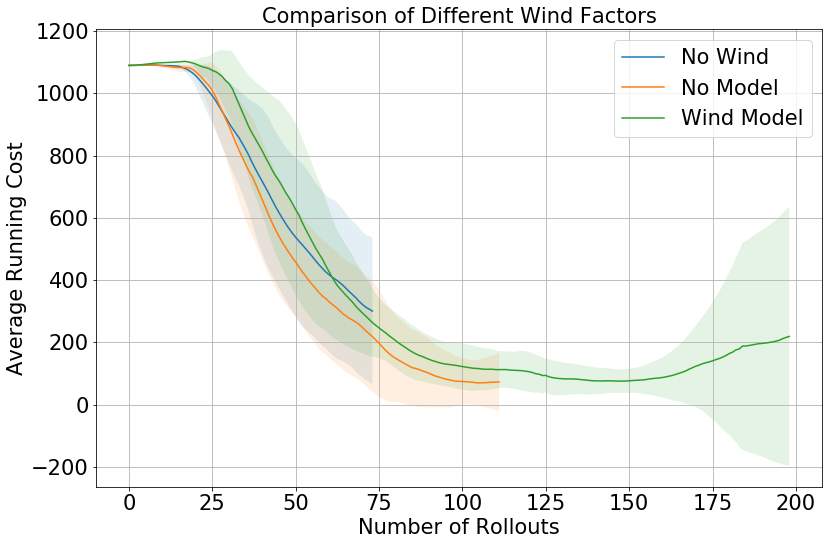

In [194]:
plt.figure(figsize = (12,8))
font_size = 21#16
len_seq = 299
cost_lqr = []
cost_ilqr = []
doc_lqr = pd.read_csv('list_lqr.csv')
doc_ilqr = pd.read_csv('list_ilqr.csv')
# Computing the cost of LQR
for i in range(149):
    cost_lqr = np.append(cost_lqr, cost_computing(1, np.array(doc_lqr.values.tolist())[i]))
# Computing the cost of ILQR
for i in range(149):
    cost_ilqr = np.append(cost_ilqr, cost_computing(1, np.array(doc_ilqr.values.tolist())[i]))
print(len(cost_lqr))
print(filename)

for i in range(len(filename)):
    # Choose the max length of sequences each group
    #if i == 3 or i == 4:
    #    Flag_Combine = False
    #else:
    #    Flag_Combine = True
    Flag_Combine = True
    state_sequence_all, cost_sequence_all, len_seq = result_process(log[i], Flag_Combine)
    # Delete the episodes be choosen in the group
    if False:
        if i == 3:
            cost_sequence_all = cost_sequence_all[:, :300]
            len_seq = 300
    if False:
        if i == 2: 
            cost_sequence_all = np.delete(cost_sequence_all, [0,3,8,9], 0)
            len_seq = 299
        elif i == 0:
            cost_sequence_all = np.delete(cost_sequence_all, [0], 0)
            len_seq = 499
        else:
            cost_sequence_all = np.delete(cost_sequence_all, [0], 0)
            len_seq = 299
    if False:
        if i == 0:
            cost_sequence_all = np.delete(cost_sequence_all, [0,1,2,3,5,9,10], 0)
            len_seq = 199
        elif i == 1:
            cost_sequence_all = np.delete(cost_sequence_all, [0,4,5,6,8,9], 0)
            len_seq = 199
        elif i == 2:
            cost_sequence_all = np.delete(cost_sequence_all, [0,1,2,3,5,6,7,8,9], 0)
            len_seq = 199
        elif i == 3:
            cost_sequence_all = np.delete(cost_sequence_all, [0,3,4,5], 0)
            len_seq = 199
        
    temp_mean = np.mean(cost_sequence_all, axis=0)
    temp_error = np.std(cost_sequence_all, axis=0)
    print(temp_mean[-1], temp_error[-1])
    #plt.errorbar(range(min_len), temp_mean , yerr=temp_error, errorevery=3, label = i)
    plt.plot(range(len_seq), temp_mean, label = labels[i])
    plt.fill_between(range(len_seq), (temp_mean - temp_error), (temp_mean + temp_error), alpha=0.12)

# Plot the cost curve of ILQR
#plt.plot(range(len(cost_lqr)), cost_lqr, '0.3', label = 'LQR')
#plt.plot(range(len(cost_ilqr)), cost_ilqr, 'k', label = 'Integral LQR')

plt.legend(loc = 'upper right')
plt.xlabel('Number of Rollouts', size = font_size)
plt.ylabel('Average Running Cost', size = font_size)
#title = 'Comparison of different Wind Factor'
plt.title(title, size = font_size)
plt.rcParams.update({'font.size': font_size})
plt.tight_layout()
#plt.xlim((-20, 300))
#plt.ylim((-100,1800))
if False:
    savefilename = 'C:\\Users\\wlkob\\OneDrive\\8_Masterarbeit\\Programs Masterarbeit\\xExperiment\\Figures\\Goal_Wind'
    plt.savefig('{}.png'.format(savefilename), format='png')
    #plt.savefig('{}.eps'.format(savefilename), format='eps')
plt.grid()
plt.show()

['81_Logger_Quadcopter_Ring_20200325075524']
0
[200, 199, 199, 199, 199, 152, 199, 199, 140, 121, 199]


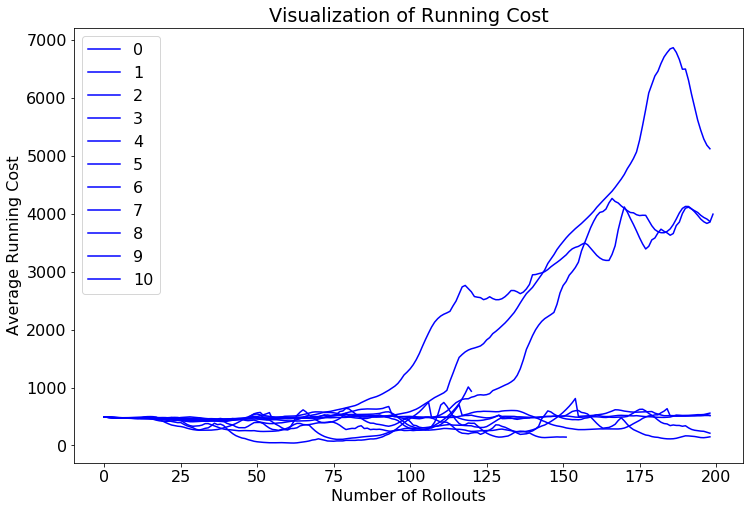

In [579]:
plt.figure(figsize = (12,8))
font_size = 16
cmap = ['b','g','r','c','m','y','k','w']
print(filename)
for i in range(len(filename)):
    print(i)
    #i = 7
    state_sequence_all, cost_sequence_all, len_seq = result_process(log[i], False)
    if True:
        # Plot the cost sequence be choosen
        #index_choose = [0,2,3,4,6,7,8,9]
        #for j in index_choose:
        for j in range(len(cost_sequence_all)):
            plt.plot(range(len(cost_sequence_all[j])), cost_sequence_all[j], label = j, color = cmap[i])
    else:
        temp_mean = np.mean(cost_sequence_all, axis=0)
        temp_error = np.std(cost_sequence_all, axis=0)
        #plt.errorbar(range(min_len), temp_mean , yerr=temp_error, errorevery=3, label = i)
        plt.plot(range(len_seq), temp_mean, label = labels[i])
        plt.fill_between(range(len_seq), (temp_mean - temp_error), (temp_mean + temp_error), alpha=0.12)
plt.legend()
plt.xlabel('Number of Rollouts', size = font_size)
plt.ylabel('Average Running Cost', size = font_size)
plt.title('Visualization of Running Cost', size = font_size*1.2)
plt.rcParams.update({'font.size': font_size})
plt.show()

Wind Model 135_Logger_Quadcopter_Ring_20200330003058
[200, 199, 199, 199, 199, 199, 199, 199]


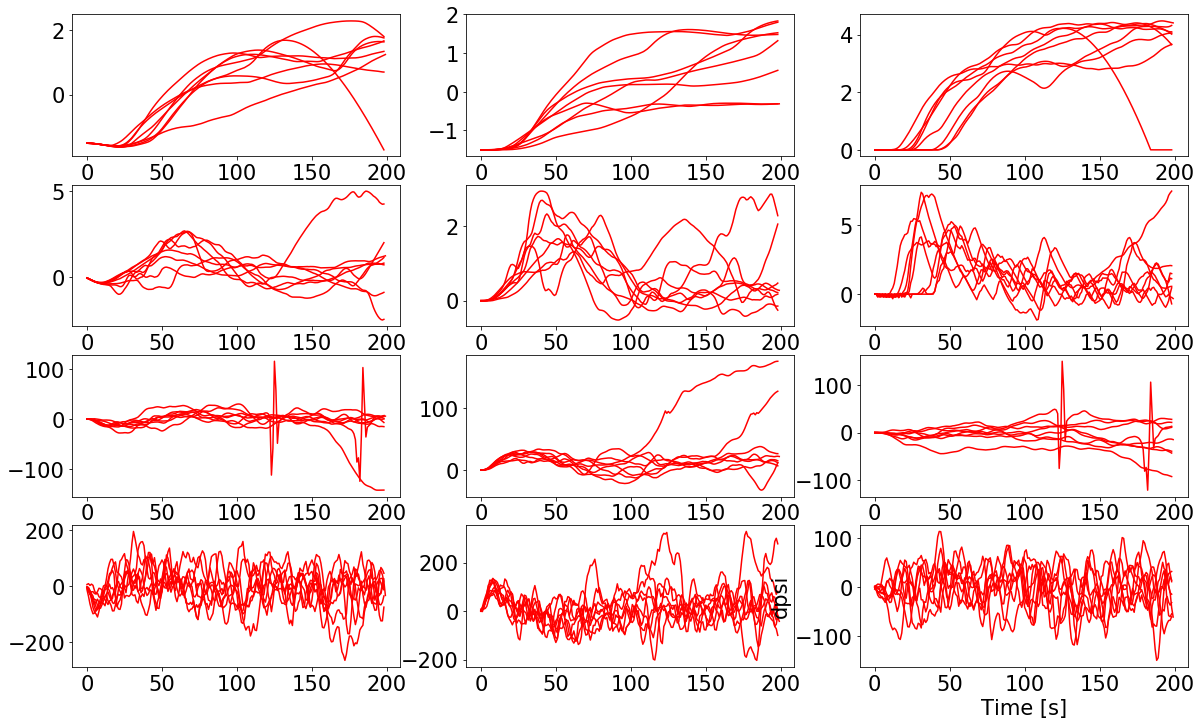

In [197]:
plt.figure(figsize = (20,12))
titles = []
cmap = ['b','g','r','c','m','y','k','b','g','r','c','m','y','k','w']
ylabels = ['x', 'y', 'z', 'dx', 'dy', 'dz', 'phi', 'theta', 'psi', 'dphi', 'dtheta', 'dpsi']
for i in range(1):#len(filename)):
    i = 2
    print(labels[i], filename[i])
    state_sequence_all, cost_sequence_all, len_seq = result_process(log[i], False)
    for j in range(12):
        plt.subplot(4,3,j+1)
        if True:
            #index_choose = [0,2,3,4,6,7,8,9]
            #for k in index_choose:
            for k in range(len(state_sequence_all)):
                #k = 8
                if j > 5:
                    plt.plot(range(len(state_sequence_all[k][:,j])), np.rad2deg(state_sequence_all[k][:,j]), label = k, color = cmap[i])
                else:                    
                    plt.plot(range(len(state_sequence_all[k][:,j])), state_sequence_all[k][:,j], label = k, color = cmap[i])
        else:
            state_mean = np.mean(np.array(state_sequence_all), axis=0)
            state_error = np.std(np.array(state_sequence_all), axis=0)
            if j > 5:
                plt.plot(range(len_seq), np.rad2deg(state_mean[:,j]), label = i)
                plt.fill_between(range(len_seq), np.rad2deg(state_mean[:,j] - state_error[:,j]), np.rad2deg(state_mean[:,j] + state_error[:,j]), alpha=0.12)
            else:
                plt.plot(range(len_seq), state_mean[:,j], label = i)
                plt.fill_between(range(len_seq), (state_mean[:,j] - state_error[:,j]), (state_mean[:,j] + state_error[:,j]), alpha=0.12)
    plt.xlabel('Time [s]')
    plt.ylabel(ylabels[j])
    #plt.legend(loc = 'upper left')
plt.show()

['103_Logger_Quadcopter_Path_20200326045417', '107_Logger_Quadcopter_Path_20200326152833', '104_Logger_Quadcopter_Path_20200326054522', '105_Logger_Quadcopter_Path_20200326054622', '106_Logger_Quadcopter_Path_20200326054702']
0
[300, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299]
1
[300, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299]
2
[300, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299]
3
[300, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299]
4
[300, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299]


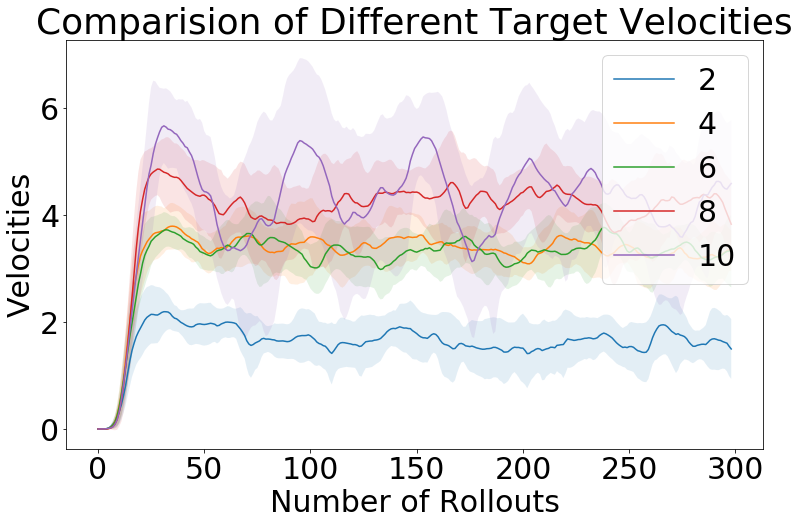

In [159]:
plt.figure(figsize = (12,8))
font_size = 30
print(filename)
cmap = ['b','g','r','c','m','y','k','w']
for i in range(len(filename)):
    print(i)
    #i = 7
    state_sequence_all, cost_sequence_all, len_seq = result_process(log[i], True)
    if True:
        # Plot the cost sequence be choosen
        #index_choose = [0,2,3,4,6,7,8,9]
        #for j in index_choose:
        velocity_all = []
        for j in range(len(cost_sequence_all)):
            velocity = np.sqrt(state_sequence_all[j][:,3]**2 + 
                               state_sequence_all[j][:,4]**2) 
                               #state_sequence_all[j][:,5]**2)
            velocity_all.append(velocity)
            #plt.plot(range(len(cost_sequence_all[j])), velocity, label = j, color = cmap[i])
    #else:
        velocity_all = np.array(velocity_all)
        temp_mean = np.mean(velocity_all, axis=0)
        temp_error = np.std(velocity_all, axis=0)
        #plt.errorbar(range(min_len), temp_mean , yerr=temp_error, errorevery=3, label = i)
        plt.plot(range(len(temp_mean)), temp_mean, label = labels[i])
        plt.fill_between(range(len(temp_mean)), (temp_mean - temp_error), (temp_mean + temp_error), alpha=0.12)
plt.legend(loc = 1)
plt.xlabel('Number of Rollouts', size = font_size)
plt.ylabel('Velocities', size = font_size)
plt.title('Comparision of Different Target Velocities', size = font_size*1.2)
plt.rcParams.update({'font.size': font_size})
plt.tight_layout()
if True:
    savefilename = 'C:\\Users\\wlkob\\OneDrive\\8_Masterarbeit\\Programs Masterarbeit\\xExperiment\\Figures\\Path_TargetSpeeds_Velocities'
    plt.savefig('{}.png'.format(savefilename), format='png')
    plt.savefig('{}.eps'.format(savefilename), format='eps')
plt.show()

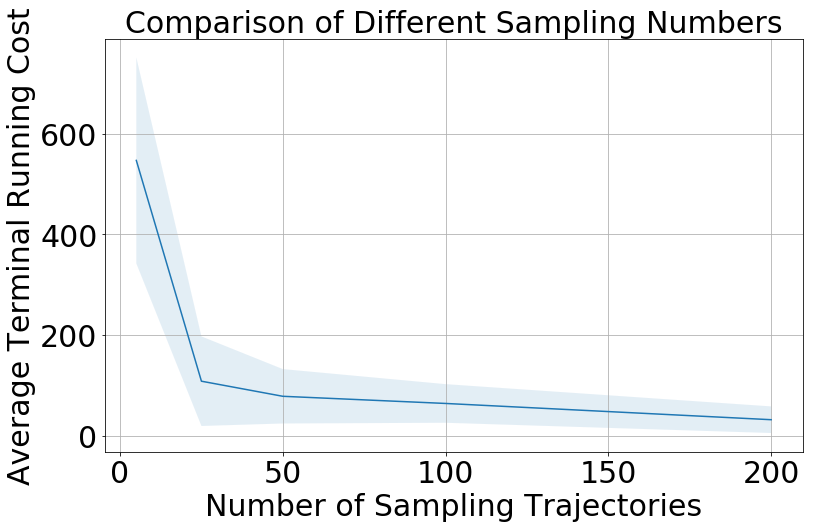

In [139]:
font_size = 30

if True:
    labels = np.array([5, 25, 50, 100, 200])
    temp_mean = np.array([546.83, 108.56, 78.6, 64.38, 32.12])
    temp_error = np.array([204.53, 88.91, 54, 38.35, 26.43])
elif True:
    labels = np.array([5,25,50,100,200,400])
    temp_mean = np.array([230, 94.2, 95.06, 103.19, 85.86, 77.27])
    temp_error = np.array([76.9, 41.42, 40.53, 31.52, 33.99, 16.85])


plt.figure(figsize = (12,8))
#plt.errorbar([5,25,50,100,200], temp_mean , yerr=temp_error, errorevery=1)
plt.plot(labels, temp_mean)
plt.fill_between(labels, (temp_mean - temp_error), (temp_mean + temp_error), alpha=0.12)

#plt.legend(loc = 'upper right')
plt.xlabel('Number of Sampling Trajectories', size = font_size)
plt.ylabel('Average Terminal Running Cost', size = font_size)
plt.title('Comparison of Different Sampling Numbers', size = font_size)
plt.rcParams.update({'font.size': font_size})
plt.tight_layout()
if True:
    savefilename = 'C:\\Users\\wlkob\\OneDrive\\8_Masterarbeit\\Programs Masterarbeit\\xExperiment\\Figures\\Goal_SamplingNumberCost1'
    plt.savefig('{}.png'.format(savefilename), format='png')
    #plt.savefig('{}.eps'.format(savefilename), format='eps')
plt.grid()
plt.show()

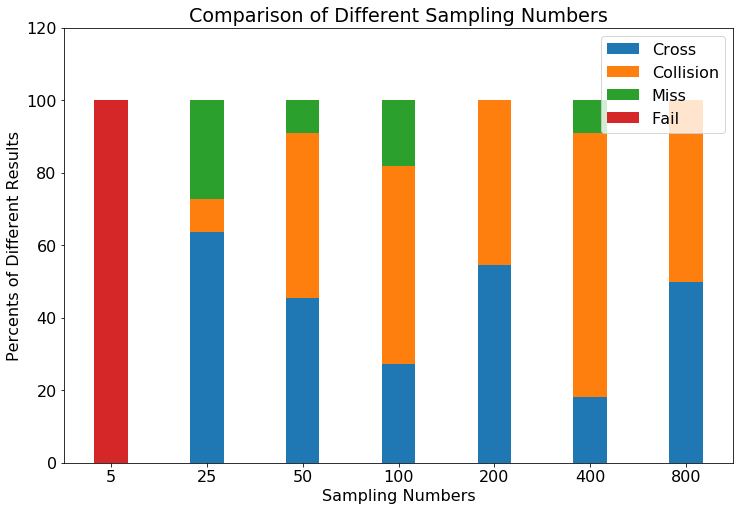

In [551]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,8))

labels = ['5','25','50','100','200', '400','800']

succe = np.array([0,7,5,3,6,2,6])
colli = np.array([0,1,5,6,5,8,6])
miss = np.array([0,3,1,2,0,1,0])
fail = np.array([11,0,0,0,0,0,0])
total = succe + colli + miss + fail

perc_succe = succe/total*100
perc_colli = colli/total*100
perc_miss = miss/total*100
perc_fail = fail/total*100

width = 0.35       # the width of the bars: can also be len(x) sequence

plt.bar(labels, perc_succe, width, label='Cross')
plt.bar(labels, perc_colli, width, bottom=perc_succe, label='Collision')
plt.bar(labels, perc_miss, width, bottom=perc_succe + perc_colli, label='Miss')
plt.bar(labels, perc_fail, width, bottom=perc_succe + perc_colli + perc_miss, label='Fail')

###############################################################################
plt.ylim((0,120))
plt.xlabel('Sampling Numbers')
plt.ylabel('Percents of Different Results')
plt.title('Comparison of Different Sampling Numbers')
plt.legend(loc = 1)

if True:
    savefilename = 'C:\\Users\\wlkob\\OneDrive\\8_Masterarbeit\\Programs Masterarbeit\\xExperiment\\Figures\\Ring_SamplingNumber'
    plt.savefig('{}.png'.format(savefilename), format='png')
    plt.savefig('{}.eps'.format(savefilename), format='eps')

plt.show()

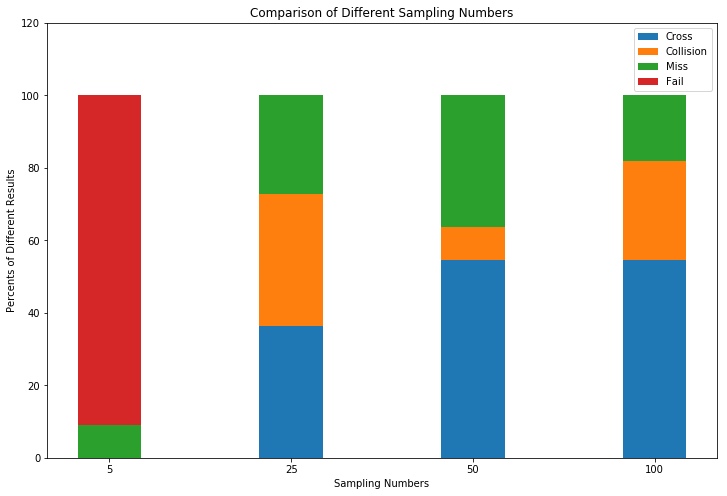

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,8))

labels = ['5','25','50','100']

succe = np.array([0,4,6,6])
colli = np.array([0,4,1,3])
miss = np.array([1,3,4,2])
fail = np.array([10,0,0,0])
total = succe + colli + miss + fail

perc_succe = succe/total*100
perc_colli = colli/total*100
perc_miss = miss/total*100
perc_fail = fail/total*100

width = 0.35       # the width of the bars: can also be len(x) sequence

plt.bar(labels, perc_succe, width, label='Cross')
#plt.bar(labels, perc_miss, width, bottom=perc_succe, label='Miss')
plt.bar(labels, perc_colli, width, bottom=perc_succe, label='Collision')
plt.bar(labels, perc_miss, width, bottom=perc_succe + perc_colli, label='Miss')
plt.bar(labels, perc_fail, width, bottom=perc_succe + perc_colli + perc_miss, label='Fail')

plt.ylim((0,120))
plt.xlabel('Sampling Numbers')
plt.ylabel('Percents of Different Results')
plt.title('Comparison of Different Sampling Numbers')
plt.legend(loc = 1)

plt.show()

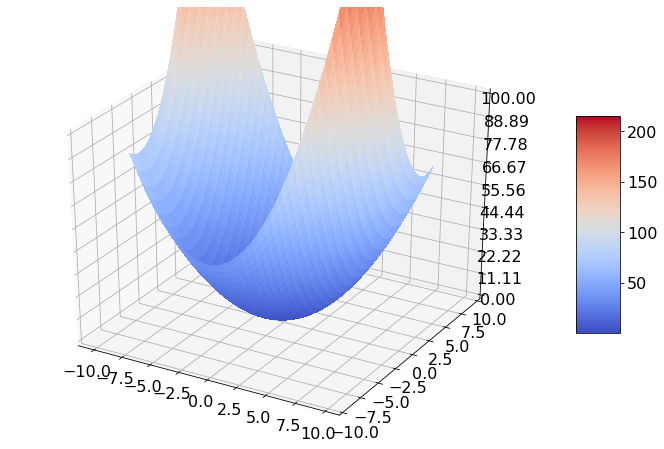

In [547]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)

h = 0
k = 0
d_a = 2.5
d_b = 1.3
angle = np.deg2rad(30)

Z = ((((X)*np.cos(angle) + (Y)*np.sin(angle) - h)/(d_a/2))**2 + (((-(X)*np.sin(angle) + (Y)*np.cos(angle) - k)/(d_b/2))**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_ylim(-10, 10)
ax.set_zlim(0, 100)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
Z = ((((X)*np.cos(angle) + (Y)*np.sin(angle) - h)/(d_a/2))**2 + (((-(X)*np.sin(angle) + (Y)*np.cos(angle) - k)/(d_b/2))**2))

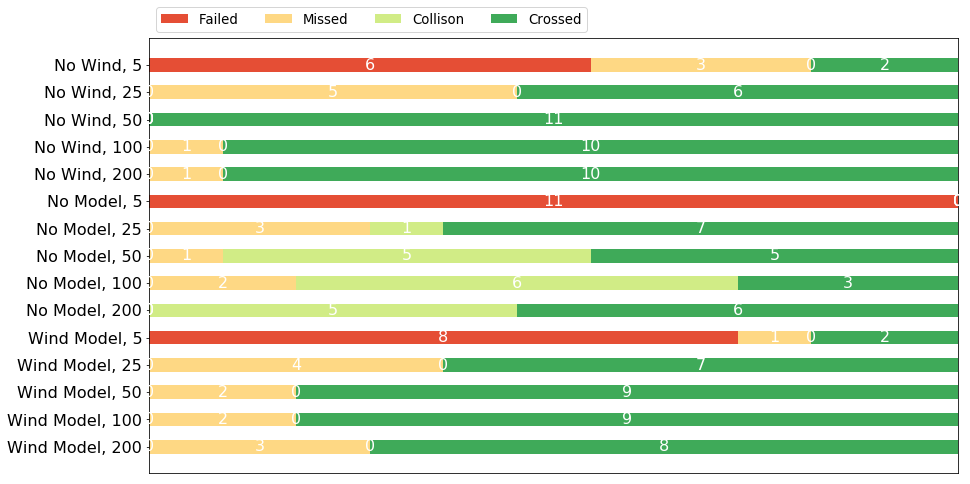

In [53]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Failed', 'Missed', 'Collison', 'Crossed']
results = {
    'No Wind, 5': [6,3,0,2],
    'No Model, 5': [11,0,0,0],
    'Wind Model, 5': [8,1,0,2],
    
    'No Wind, 25': [0,5,0,6],
    'No Model, 25': [0,3,1,7],
    'Wind Model, 25': [0,4,0,7],
    
    'No Wind, 50': [0,0,0,11],
    'No Model, 50': [0,1,5,5],
    'Wind Model, 50': [0,2,0,9],
    
    'No Wind, 100': [0,1,0,10],
    'No Model, 100': [0,2,6,3],
    'Wind Model, 100': [0,2,0,9],
    
    'No Wind, 200': [0,1,0,10],
    'No Model, 200': [0,0,5,6],
    'Wind Model, 200': [0,3,0,8],
}

results = {
    'No Wind, 5': [6,3,0,2],
    'No Wind, 25': [0,5,0,6],
    'No Wind, 50': [0,0,0,11],
    'No Wind, 100': [0,1,0,10],
    'No Wind, 200': [0,1,0,10],
    
    'No Model, 5': [11,0,0,0],
    'No Model, 25': [0,3,1,7],
    'No Model, 50': [0,1,5,5],
    'No Model, 100': [0,2,6,3],
    'No Model, 200': [0,0,5,6],
    
    'Wind Model, 5': [8,1,0,2],    
    'Wind Model, 25': [0,4,0,7],    
    'Wind Model, 50': [0,2,0,9],    
    'Wind Model, 100': [0,2,0,9],    
    'Wind Model, 200': [0,3,0,8]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(14.5, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

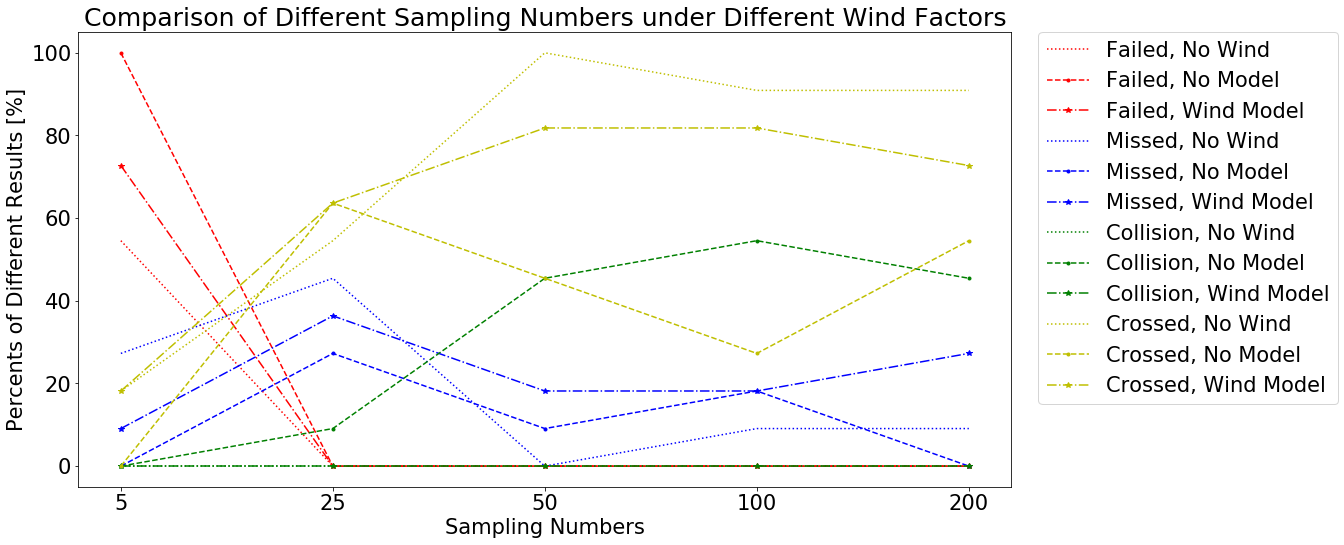

In [177]:
fontsize = 30
results = {
    'No Wind, 5': [6,3,0,2],
    'No Wind, 25': [0,5,0,6],
    'No Wind, 50': [0,0,0,11],
    'No Wind, 100': [0,1,0,10],
    'No Wind, 200': [0,1,0,10],
    
    'No Model, 5': [11,0,0,0],
    'No Model, 25': [0,3,1,7],
    'No Model, 50': [0,1,5,5],
    'No Model, 100': [0,2,6,3],
    'No Model, 200': [0,0,5,6],
    
    'Wind Model, 5': [8,1,0,2],    
    'Wind Model, 25': [0,4,0,7],    
    'Wind Model, 50': [0,2,0,9],    
    'Wind Model, 100': [0,2,0,9],    
    'Wind Model, 200': [0,3,0,8]
}

plt.figure(figsize = (20,8))

labels = [5,25,50,100,200]
labels = ['5','25','50','100','200']
failed_1 = np.array([6,0,0,0,0])/11*100
failed_2 = np.array([11,0,0,0,0])/11*100
failed_3 = np.array([8,0,0,0,0])/11*100
stay_1 = np.array([3,5,0,1,1])/11*100
stay_2 = np.array([0,3,1,2,0])/11*100
stay_3 = np.array([1,4,2,2,3])/11*100
collision_1 = np.array([0,0,0,0,0])/11*100
collision_2 = np.array([0,1,5,6,5])/11*100
collision_3 = np.array([0,0,0,0,0])/11*100
cross_1 = np.array([2,6,11,10,10])/11*100
cross_2 = np.array([0,7,5,3,6])/11*100
cross_3 = np.array([2,7,9,9,8])/11*100

plt.plot(labels, failed_1, 'r:', label = 'Failed, No Wind')
plt.plot(labels, failed_2, 'r.--', label = 'Failed, No Model')
plt.plot(labels, failed_3, 'r*-.', label = 'Failed, Wind Model')

plt.plot(labels, stay_1, 'b:', label = 'Missed, No Wind')
plt.plot(labels, stay_2, 'b.--', label = 'Missed, No Model')
plt.plot(labels, stay_3, 'b*-.', label = 'Missed, Wind Model')

plt.plot(labels, collision_1, 'g:', label = 'Collision, No Wind')
plt.plot(labels, collision_2, 'g.--', label = 'Collision, No Model')
plt.plot(labels, collision_3, 'g*-.', label = 'Collision, Wind Model')

plt.plot(labels, cross_1, 'y:', label = 'Crossed, No Wind')
plt.plot(labels, cross_2, 'y.--', label = 'Crossed, No Model')
plt.plot(labels, cross_3, 'y*-.', label = 'Crossed, Wind Model')

plt.legend(loc='upper right', bbox_to_anchor=(1.35,1.0),borderaxespad = 0.)
plt.xlabel('Sampling Numbers')
plt.ylabel('Percents of Different Results [%]')
plt.title('Comparison of Different Sampling Numbers under Different Wind Factors')
plt.rcParams.update({'font.size': font_size})
plt.tight_layout()
if False:
    savefilename = 'C:\\Users\\wlkob\\OneDrive\\8_Masterarbeit\\Programs Masterarbeit\\xExperiment\\Figures\\Ring_SamplingNumberWind'
    plt.savefig('{}.png'.format(savefilename), format='png')
    plt.savefig('{}.eps'.format(savefilename), format='eps')
plt.show()

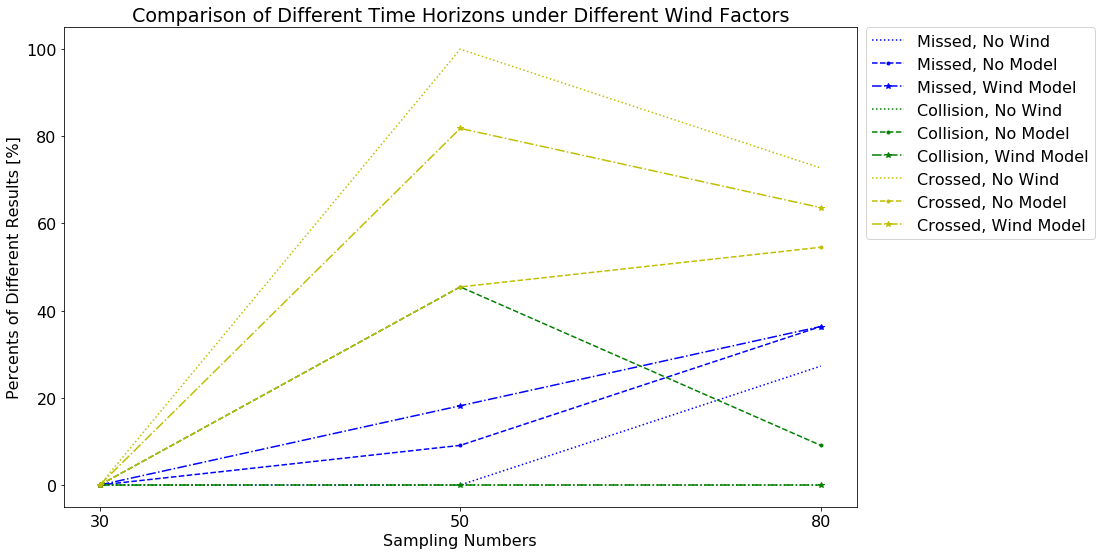

In [108]:
fontsize = 16

plt.figure(figsize = (16,8))

labels = ['30', '50', '80']
failed_1 = np.array([0,0,0])/11*100
failed_2 = np.array([0,0,0])/11*100
failed_3 = np.array([0,0,0])/11*100
stay_1 = np.array([0,0,3])/11*100
stay_2 = np.array([0,1,4])/11*100
stay_3 = np.array([0,2,4])/11*100
collision_1 = np.array([0,0,0])/11*100
collision_2 = np.array([0,5,1])/11*100
collision_3 = np.array([0,0,0])/11*100
cross_1 = np.array([0,11,8])/11*100
cross_2 = np.array([0,5,6])/11*100
cross_3 = np.array([0,9,7])/11*100

#plt.plot(labels, failed_1, 'r:', label = 'Failed, No Wind')
#plt.plot(labels, failed_2, 'r.--', label = 'Failed, No Model')
#plt.plot(labels, failed_3, 'r*-.', label = 'Failed, Wind Model')

plt.plot(labels, stay_1, 'b:', label = 'Missed, No Wind')
plt.plot(labels, stay_2, 'b.--', label = 'Missed, No Model')
plt.plot(labels, stay_3, 'b*-.', label = 'Missed, Wind Model')

plt.plot(labels, collision_1, 'g:', label = 'Collision, No Wind')
plt.plot(labels, collision_2, 'g.--', label = 'Collision, No Model')
plt.plot(labels, collision_3, 'g*-.', label = 'Collision, Wind Model')

plt.plot(labels, cross_1, 'y:', label = 'Crossed, No Wind')
plt.plot(labels, cross_2, 'y.--', label = 'Crossed, No Model')
plt.plot(labels, cross_3, 'y*-.', label = 'Crossed, Wind Model')

plt.rcParams.update({'font.size': font_size})
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),borderaxespad = 0.)
plt.xlabel('Sampling Numbers')
plt.ylabel('Percents of Different Results [%]')
plt.title('Comparison of Different Time Horizons under Different Wind Factors')
plt.tight_layout()
if False:
    savefilename = 'C:\\Users\\wlkob\\OneDrive\\8_Masterarbeit\\Programs Masterarbeit\\xExperiment\\Figures\\Ring_TimeHorizonWind'
    plt.savefig('{}.png'.format(savefilename), format='png')
    plt.savefig('{}.eps'.format(savefilename), format='eps')
plt.show()